In [222]:
# @title bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [223]:
color_pal = sns.color_palette("Paired", 10)

color_pal

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509)]

O dataset

In [224]:
df = pd.read_csv('dataset/superstore.csv')

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# limpeza do dataset

In [225]:
colunas_remover = ['Order ID', 'Country', 'Ship Date', 'Ship Mode', 'Customer ID', 'State', 'Postal Code', 'Region', 'Product ID','Country','Segment']

df = df.drop(colunas_remover, axis=1)

In [226]:
df.head()

,Row ID,Order Date,Customer Name,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,11/8/2016,Claire Gute,Henderson,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,11/8/2016,Claire Gute,Henderson,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,6/12/2016,Darrin Van Huff,Los Angeles,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,10/11/2015,Sean O'Donnell,Fort Lauderdale,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,10/11/2015,Sean O'Donnell,Fort Lauderdale,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [227]:
product_str = df['Product Name'].value_counts()

product_str

Product Name
Staple envelope                                                            48
Staples                                                                    46
Easy-staple paper                                                          46
Avery Non-Stick Binders                                                    20
Staples in misc. colors                                                    19
                                                                           ..
Xiaomi Mi3                                                                  1
Sanitaire Vibra Groomer IR Commercial Upright Vacuum, Replacement Belts     1
Holmes Harmony HEPA Air Purifier for 17 x 20 Room                           1
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                          1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                      1
Name: count, Length: 1850, dtype: int64

In [228]:
#so o prod + vendido
df = df.loc[df['Product Name'] == 'Staple envelope']

In [229]:
colunas_remover = ['Category', 'Sub-Category', 'Product Name']

df = df.drop(colunas_remover, axis=1)


In [230]:
#acertando o formato das datas
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

df = df.sort_values(by='Order Date')

print('Menor data: ', df['Year'].min())
print('Maior data: ', df['Year'].max())

Menor data:  2014
Maior data:  2017


# Entendendo o Dataset / Análise Exploratória

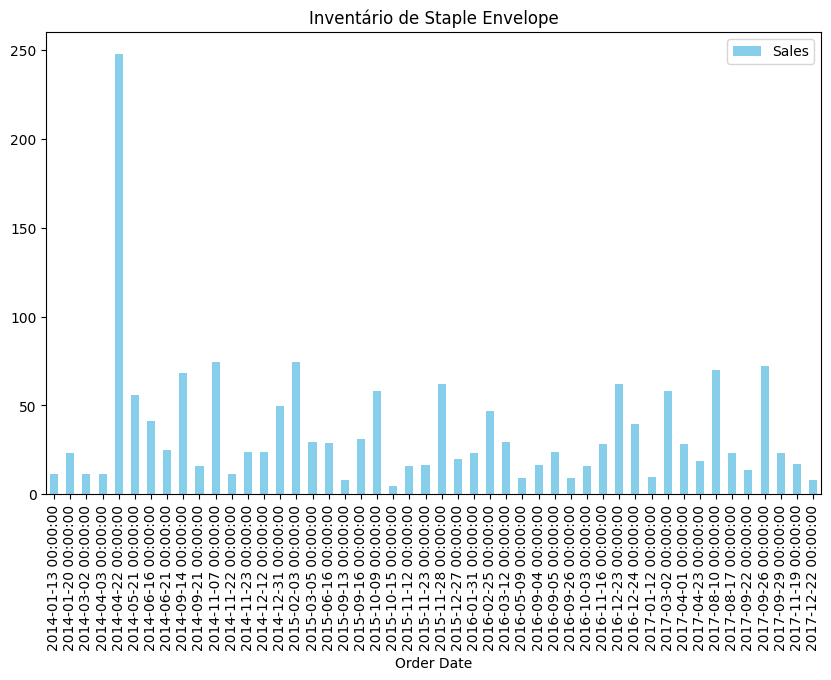

In [231]:
df.plot(kind='bar', x='Order Date', y='Sales', figsize=(10, 6), color='skyblue', title='Inventário de Staple Envelope')
plt.show()

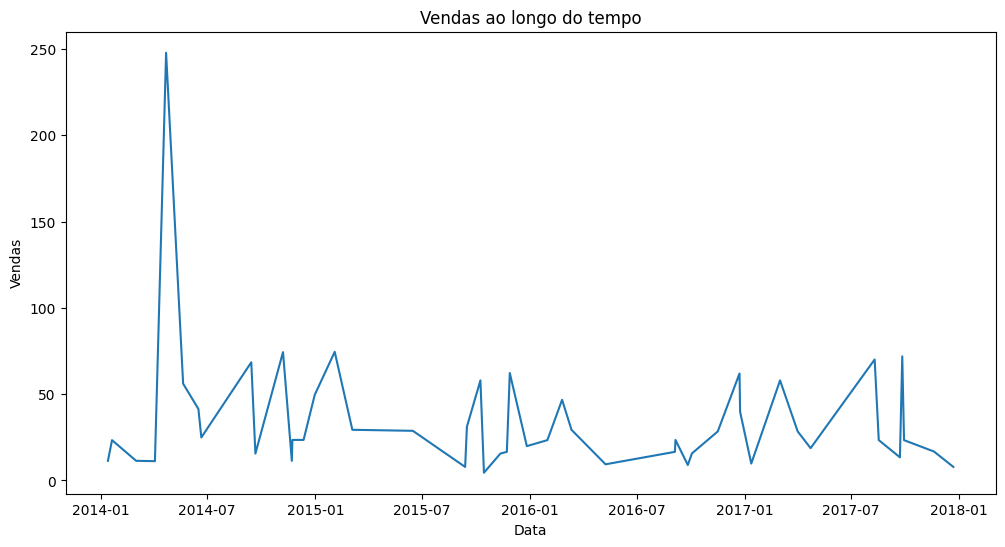

In [232]:
df_serie = df.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df['Order Date'], df['Sales'])
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.show()


In [233]:
print(df_serie.info())
print(df_serie.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  48 non-null     datetime64[ns]
 1   Sales       48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 900.0 bytes
None
                Order Date       Sales
count                   48   48.000000
mean   2015-12-16 13:00:00   35.141917
min    2014-01-13 00:00:00    4.464000
25%    2014-11-22 18:00:00   15.560000
50%    2015-11-25 12:00:00   23.472000
75%    2016-12-23 06:00:00   47.432000
max    2017-12-22 00:00:00  247.840000
std                    NaN   37.610476


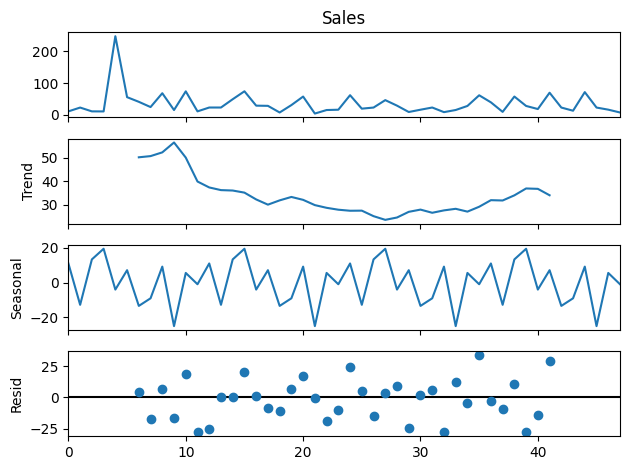

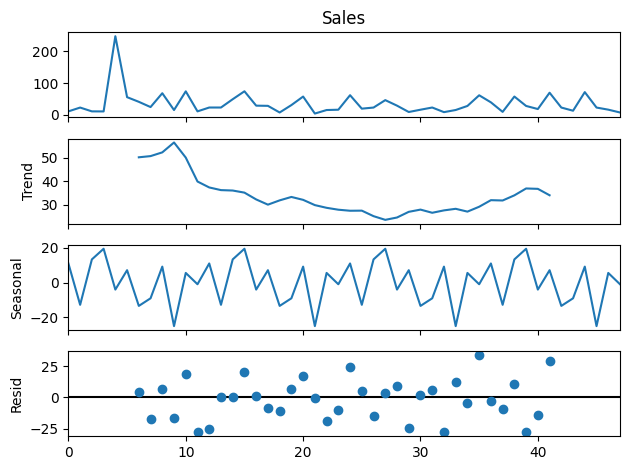

In [234]:
decomposition = seasonal_decompose(df_serie['Sales'], model='additive', period=12)
decomposition.plot()

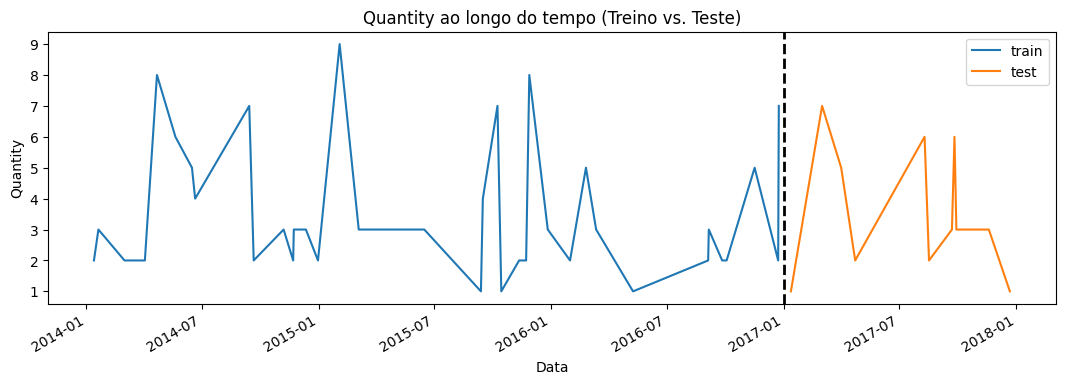

In [235]:
color_pal = ['#1f77b4', '#ff7f0e']

df.set_index('Order Date', inplace=True)

train = df.loc[df.index < '2017-01-12']
test = df.loc[df.index >= '2017-01-12']

fig, ax = plt.subplots(1, 1, figsize=(13, 4))
train['Quantity'].plot(ax=ax, color=color_pal[0])
test['Quantity'].plot(ax=ax, color=color_pal[1])
ax.axvline('2017-01-01', color='black', linestyle='--', lw=2)
ax.legend(['train', 'test'])
plt.xlabel('Data')
plt.ylabel('Quantity')
plt.title('Quantity ao longo do tempo (Treino vs. Teste)')
plt.show()

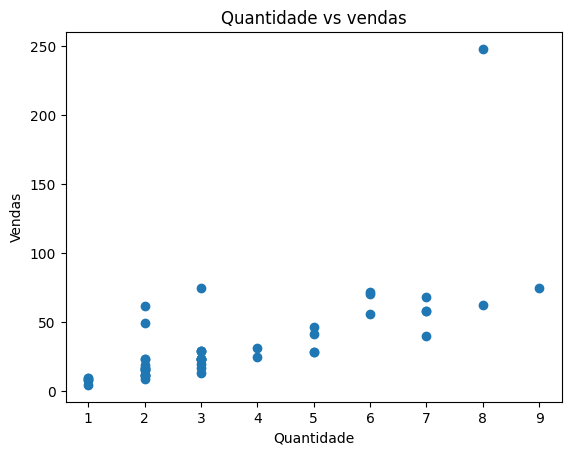

In [236]:
#dispersão
plt.scatter(df['Quantity'], df['Sales'])
plt.xlabel('Quantidade')
plt.ylabel('Vendas')
plt.title('Quantidade vs vendas')
plt.show()

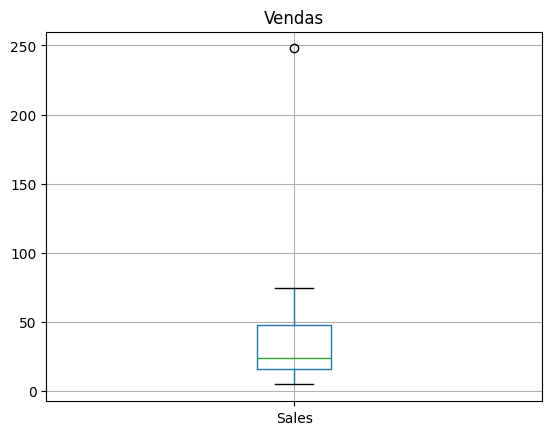

,Row ID,Customer Name,City,Sales,Quantity,Discount,Profit,Year,Month,Day
Order Date,,,,,,,,,,
2014-04-22,7164,Aaron Hawkins,Troy,247.84,8,0.0,121.4416,2014,4,22


In [237]:
#outliers
df.boxplot(column=['Sales'])
plt.title('Vendas')
plt.show()

z_scores = stats.zscore(df['Sales'])
outliers = df[np.abs(z_scores) > 3]

outliers
     

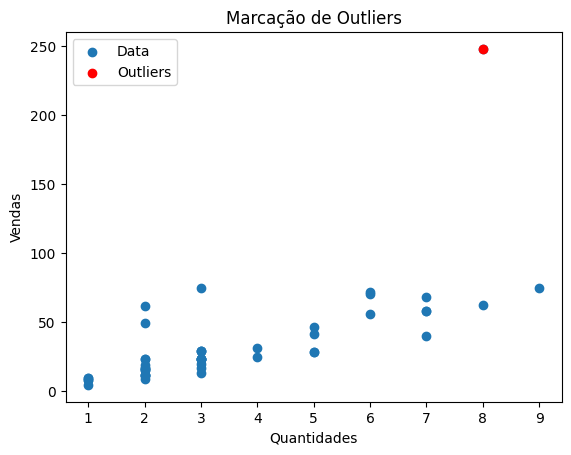

In [238]:
# Gráfico de dispersão com outliers destacados
plt.scatter(df['Quantity'], df['Sales'], label='Data')
plt.scatter(outliers['Quantity'], outliers['Sales'], color='red', label='Outliers')
plt.xlabel('Quantidades')
plt.ylabel('Vendas')
plt.title('Marcação de Outliers')
plt.legend()
plt.show()


In [239]:
#features e target
X = df[['Quantity', 'Discount', 'Profit']]
y = df['Sales']

#treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

#regressão linear
regres_linear = LinearRegression()
regres_linear.fit(x_treino, y_treino)

#previsões
y_prev = regres_linear.predict(x_teste)


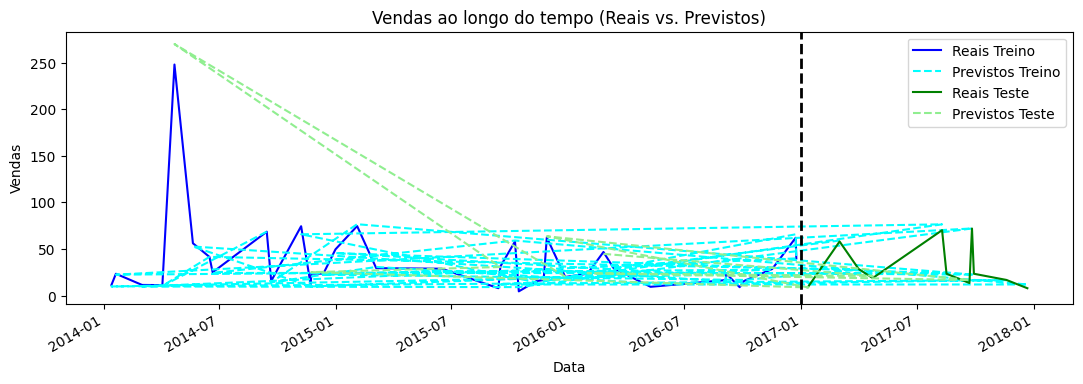

In [255]:
fig, ax = plt.subplots(1, 1, figsize=(13, 4))

#reais para o conjunto de treino
train['Sales'].plot(ax=ax, color='blue', label='Reais Treino')

#previstos para o conjunto de treino
train_pred = pd.Series(model.predict(x_treino), index=x_treino.index)
train_pred.plot(ax=ax, color='cyan', linestyle='--', label='Previstos Treino')

#reais para o conjunto de teste
test['Sales'].plot(ax=ax, color='green', label='Reais Teste')

#previstos para o conjunto de teste
test_pred = pd.Series(model.predict(x_teste), index=x_teste.index)
test_pred.plot(ax=ax, color='lightgreen', linestyle='--', label='Previstos Teste')

#divisão entre treino e teste
ax.axvline('2017-01-01', color='black', linestyle='--', lw=2)

ax.legend()
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Vendas ao longo do tempo (Reais vs. Previstos)')
plt.show()


In [256]:
#IQR (intervalo interquartil, é uma medida estatistica para dispersão dos dados)
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

#df sem outliers
df_sem_outliers = df[~((df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR)))]

X_sem_outliers = df_sem_outliers[['Quantity', 'Discount', 'Profit']]
y_sem_outliers = df_sem_outliers['Sales']

x_treino_sem_outliers, x_teste_sem_outliers, y_treino_sem_outliers, y_teste_sem_outliers = train_test_split(X_sem_outliers, y_sem_outliers, test_size=0.2, random_state=42)

#treinando modelo sem outliers
model_sem_outliers = LinearRegression()
model_sem_outliers.fit(x_treino_sem_outliers, y_treino_sem_outliers)
y_pred_sem_outliers = model_sem_outliers.predict(x_teste_sem_outliers)
mse_without_outliers = mean_squared_error(y_teste_sem_outliers, y_pred_sem_outliers)

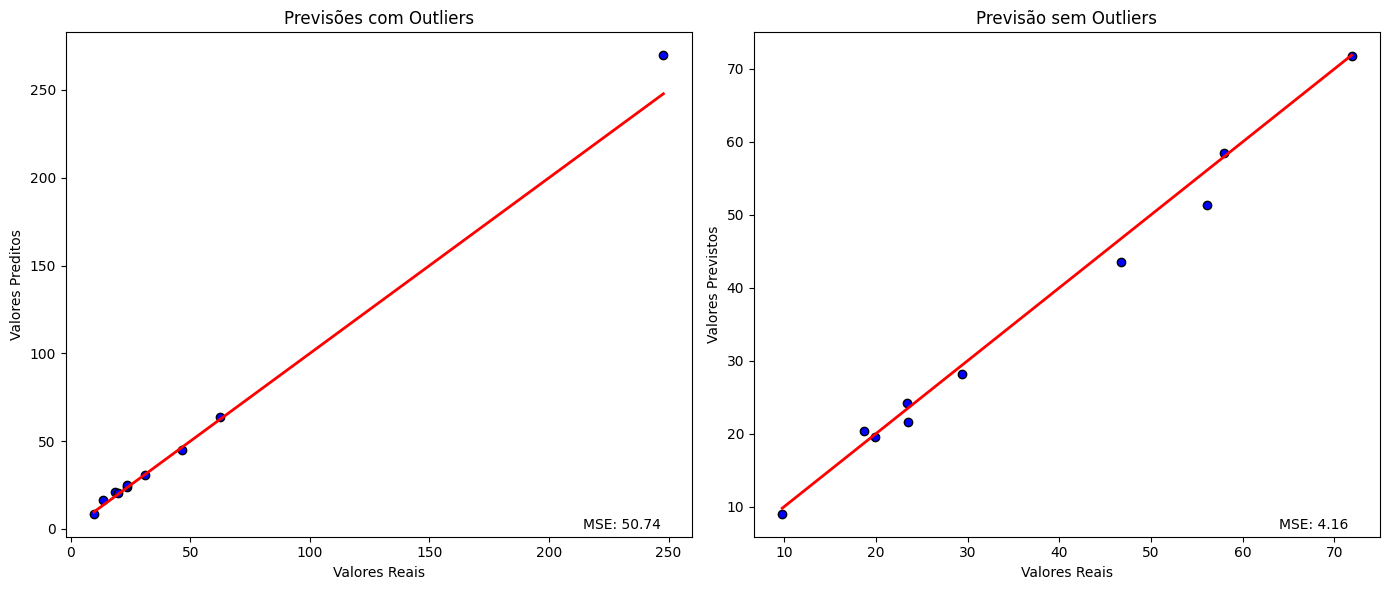

In [242]:
plt.figure(figsize=(14, 6))

#com outliers
plt.subplot(1, 2, 1)
plt.scatter(y_teste, y_pred, color='blue', edgecolor='k')
plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], color='red', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Previsões com Outliers')
plt.text(0.95, 0.01, f'MSE: {mse_with_outliers:.2f}', transform=plt.gca().transAxes, verticalalignment='bottom', horizontalalignment='right')

#sem outliers
plt.subplot(1, 2, 2)
plt.scatter(y_teste_sem_outliers, y_pred_sem_outliers, color='blue', edgecolor='k')
plt.plot([y_teste_sem_outliers.min(), y_teste_sem_outliers.max()], [y_teste_sem_outliers.min(), y_teste_sem_outliers.max()], color='red', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Previsão sem Outliers')
plt.text(0.95, 0.01, f'MSE: {mse_without_outliers:.2f}', transform=plt.gca().transAxes, verticalalignment='bottom', horizontalalignment='right')

plt.tight_layout()
plt.show()


In [243]:
#métricas de erro
mse = mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_teste, y_pred)
r2 = r2_score(y_teste, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")


Erro Quadrático Médio (MSE): 50.74
Raiz do Erro Quadrático Médio (RMSE): 7.12
Erro Absoluto Médio (MAE): 3.51
Coeficiente de Determinação (R²): 0.99


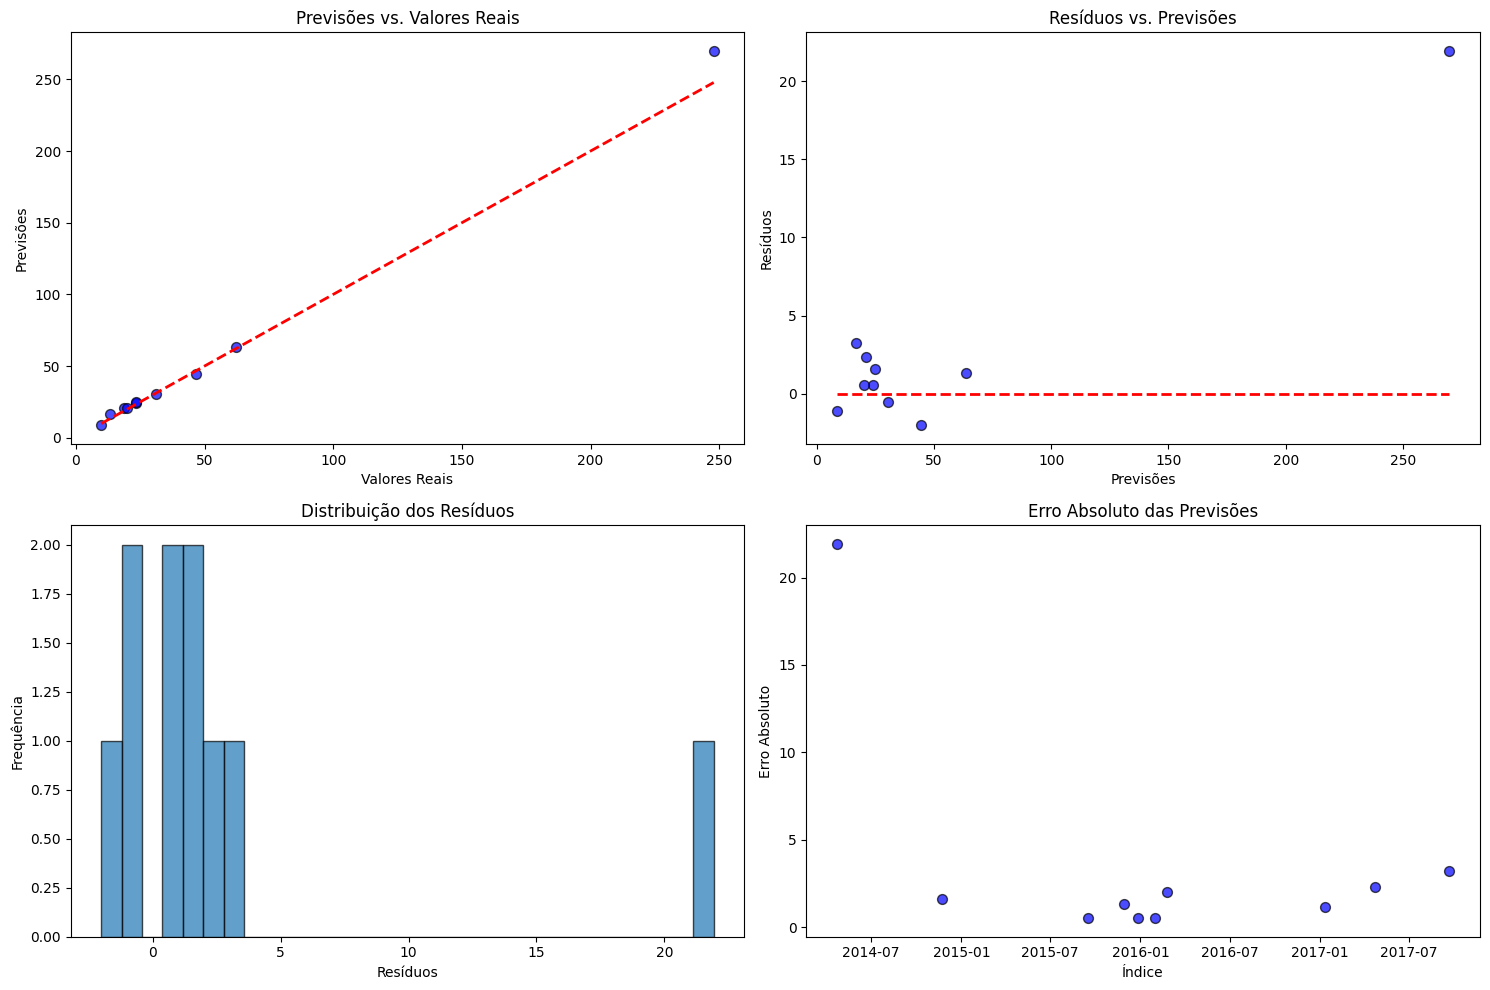

In [248]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(y_teste, y_prev, color='blue', edgecolor='k', s=50, alpha=0.7)
plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais')

plt.subplot(2, 2, 2)
plt.scatter(y_prev, y_prev - y_teste, color='blue', edgecolor='k', s=50, alpha=0.7)
plt.hlines(y=0, xmin=y_prev.min(), xmax=y_prev.max(), color='red', linestyle='--', linewidth=2)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Previsões')

plt.subplot(2, 2, 3)
plt.hist(y_prev - y_teste, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos')

plt.subplot(2, 2, 4)
plt.scatter(y_teste.index, np.abs(y_prev - y_teste), color='blue', edgecolor='k', s=50, alpha=0.7)
plt.xlabel('Índice')
plt.ylabel('Erro Absoluto')
plt.title('Erro Absoluto das Previsões')

plt.tight_layout()
plt.show()


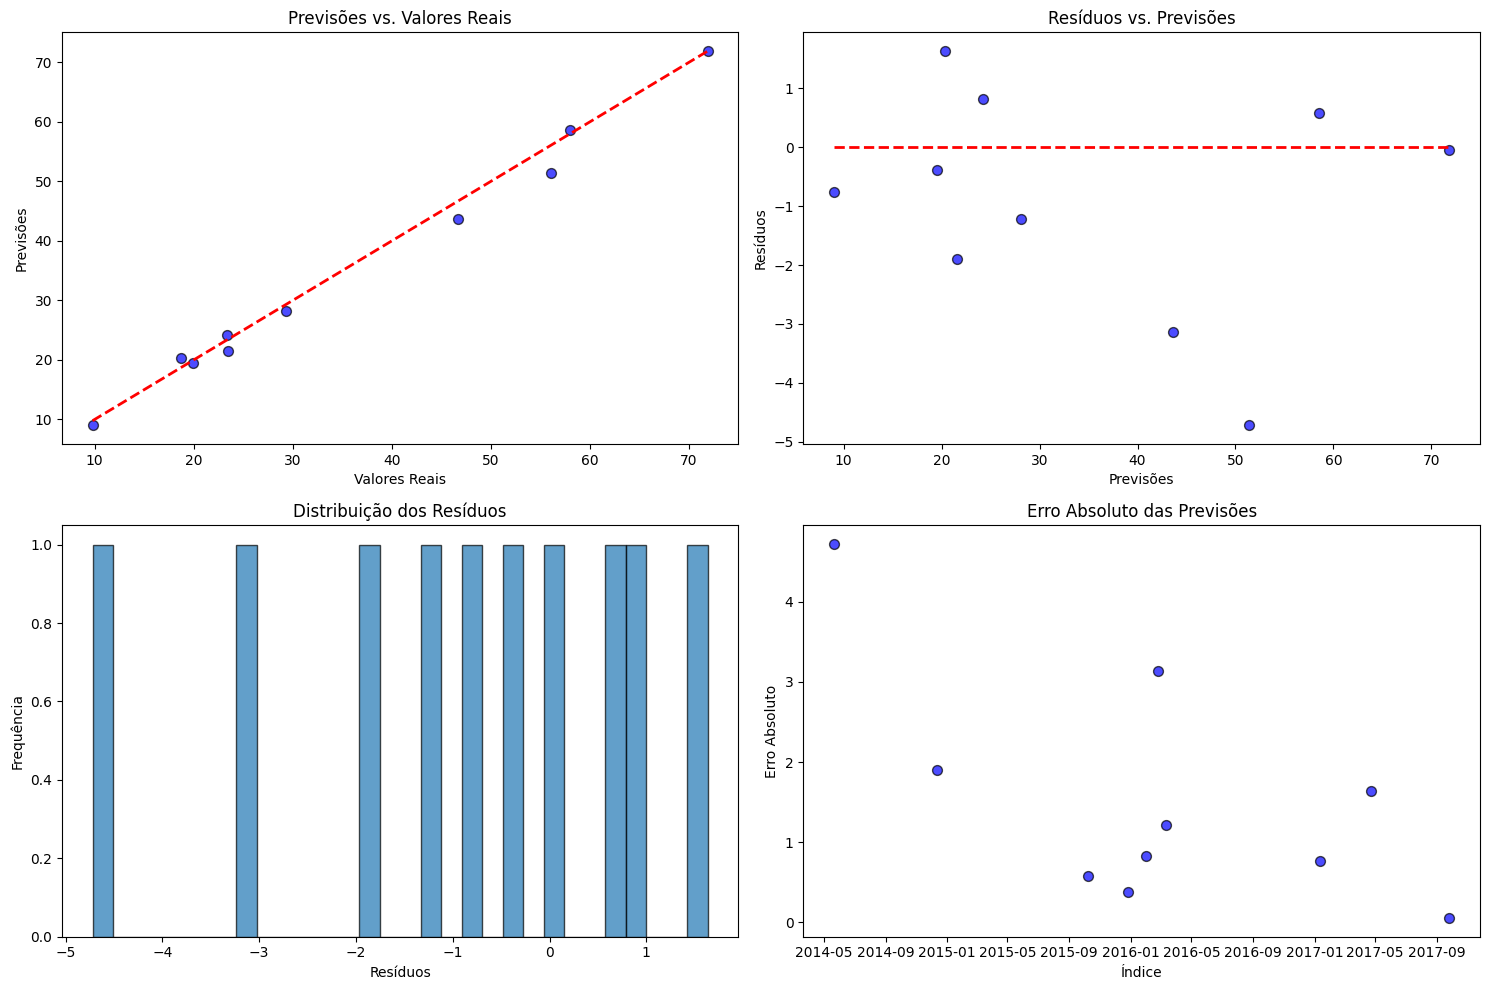

In [251]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(y_teste_sem_outliers, y_pred_sem_outliers, color='blue', edgecolor='k', s=50, alpha=0.7)
plt.plot([y_teste_sem_outliers.min(), y_teste_sem_outliers.max()], [y_teste_sem_outliers.min(), y_teste_sem_outliers.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais')

plt.subplot(2, 2, 2)
plt.scatter(y_pred_sem_outliers, y_pred_sem_outliers - y_teste_sem_outliers, color='blue', edgecolor='k', s=50, alpha=0.7)
plt.hlines(y=0, xmin=y_pred_sem_outliers.min(), xmax=y_pred_sem_outliers.max(), color='red', linestyle='--', linewidth=2)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Previsões')

plt.subplot(2, 2, 3)
plt.hist(y_pred_sem_outliers - y_teste_sem_outliers, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos')

plt.subplot(2, 2, 4)
plt.scatter(y_teste_sem_outliers.index, np.abs(y_pred_sem_outliers - y_teste_sem_outliers), color='blue', edgecolor='k', s=50, alpha=0.7)
plt.xlabel('Índice')
plt.ylabel('Erro Absoluto')
plt.title('Erro Absoluto das Previsões')

plt.tight_layout()
plt.show()

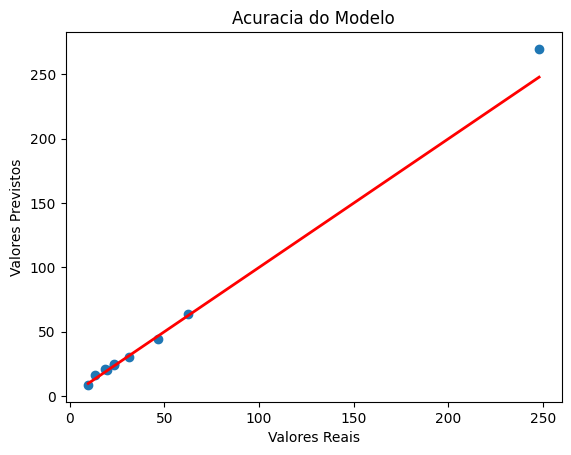

In [244]:
plt.scatter(y_teste, y_pred)
plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], color='red', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Acuracia do Modelo')
plt.show()

In [249]:
print("MSE = Mean Squared Error")
print("MSE com outliers:", mse_with_outliers)
print("MSE sem outliers:", mse_without_outliers)


MSE = Mean Squared Error
MSE com outliers: 50.73923935176304
MSE sem outliers: 4.159933759873591
